# Introduction

Another notebook to experience some basic EDA.

Original src: [Manish Gaurav (https://www.kaggle.com/gmanish/eda-bike-sharing/data?select=day.csv)](https://www.kaggle.com/gmanish/eda-bike-sharing/data?select=day.csv)

## Import Libs

In [1]:
import os
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

pd.set_option("display.max_columns", 80)

## Import Data, Review and Process

In [2]:
bike = pd.read_csv('./../data/bike_sharing/day.csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [6]:
bike.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
626,627,2012-09-18,3,1,9,0,2,1,2,0.623333,0.565067,0.872500,0.357587,371,3702,4073
493,494,2012-05-08,2,1,5,0,2,1,2,0.581667,0.557471,0.685833,0.296029,738,4990,5728
574,575,2012-07-28,3,1,7,0,6,0,1,0.755833,0.697604,0.613333,0.157350,2234,4451,6685
528,529,2012-06-12,2,1,6,0,2,1,2,0.653333,0.597875,0.833333,0.214546,477,4495,4972
136,137,2011-05-17,2,0,5,0,2,1,2,0.561667,0.538529,0.837917,0.277354,678,3445,4123


In [7]:
bike.shape

(731, 16)

### Check NULL in the datasets

In [8]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Renaming the columns to helpful names for this context

In [9]:
bike.rename(
  columns={
    'holiday':'is_holiday',
    'workingday':'is_workingday',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'mnth':'month',
    'cnt':'count',
    'yr':'year'
  },
  inplace=True
)

In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instant            731 non-null    int64  
 1   dteday             731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   is_holiday         731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   is_workingday      731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  count              731 non-null    int64  
dtypes: float64(4), int64(11), 

### Convert column values to helpful names

In [11]:
bike['month'] = bike['month'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 
                                   9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

bike['weather_condition'] = bike['weather_condition'].map({1:"Clear", 2:"Cloudy", 3:"Light Rain", 4:"Heavy Rain"})

bike['season'] = bike['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

dmap = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'}
bike['weekday'].astype('object')
bike['weekday'] = bike['weekday'].map(dmap)



In [15]:
bike.sample(5)

,instant,dteday,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
104,105,2011-04-15,summer,0,Apr,1,Fri,0,Clear,0.446667,0.441913,0.671250,0.226375,642,2484,3126
607,608,2012-08-30,fall,1,Aug,0,Thu,1,Clear,0.706667,0.652779,0.590417,0.077117,1172,6541,7713
258,259,2011-09-16,fall,0,Sep,0,Fri,1,Cloudy,0.469167,0.461475,0.590417,0.164183,742,4018,4760
206,207,2011-07-26,fall,0,Jul,0,Tue,1,Clear,0.771667,0.696979,0.540833,0.200258,750,3840,4590
569,570,2012-07-23,fall,1,Jul,0,Mon,1,Clear,0.741667,0.690017,0.694167,0.138683,1135,5831,6966


## Plotting Features (Variables)

Plotting the features compared to the count

<Axes: xlabel='weather_condition', ylabel='count'>

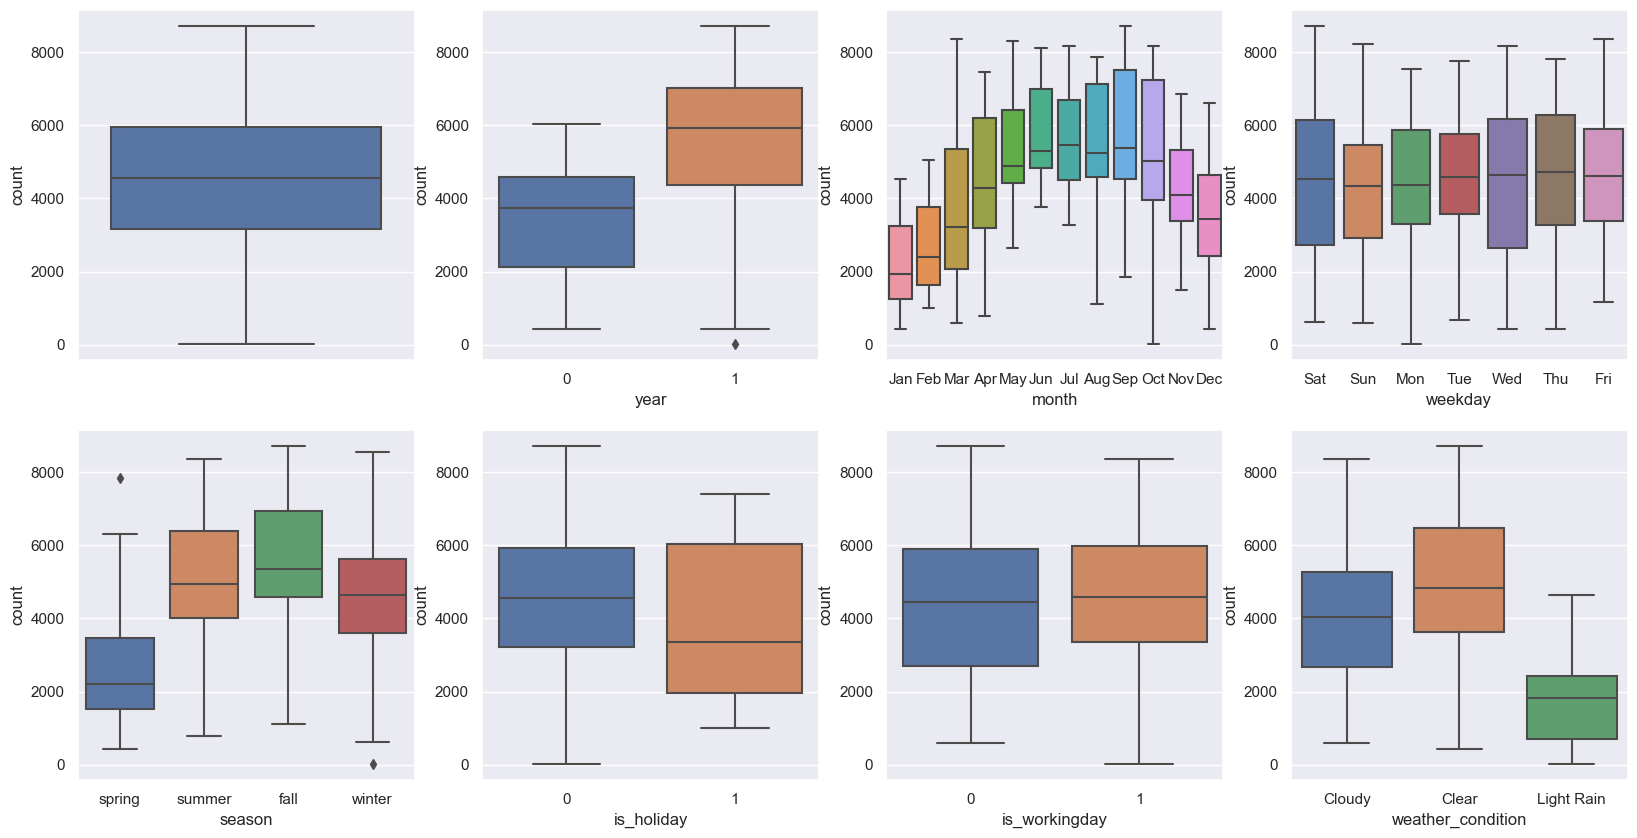

In [16]:
# Create multiple axes for single figure with subplots
figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20, 10)

# Use the 2 rows of subplot axes to explore the variables
sns.boxplot(data=bike, y='count', ax=ax1)
sns.boxplot(data=bike, x='year', y='count', ax=ax2)
sns.boxplot(data=bike, x='month', y='count', ax=ax3)
sns.boxplot(data=bike, x='weekday', y='count', ax=ax4)
sns.boxplot(data=bike, x='season', y='count', ax=ax5)
sns.boxplot(data=bike, x='is_holiday', y='count', ax=ax6)
sns.boxplot(data=bike, x='is_workingday', y='count', ax=ax7)
sns.boxplot(data=bike, x='weather_condition', y='count', ax=ax8)


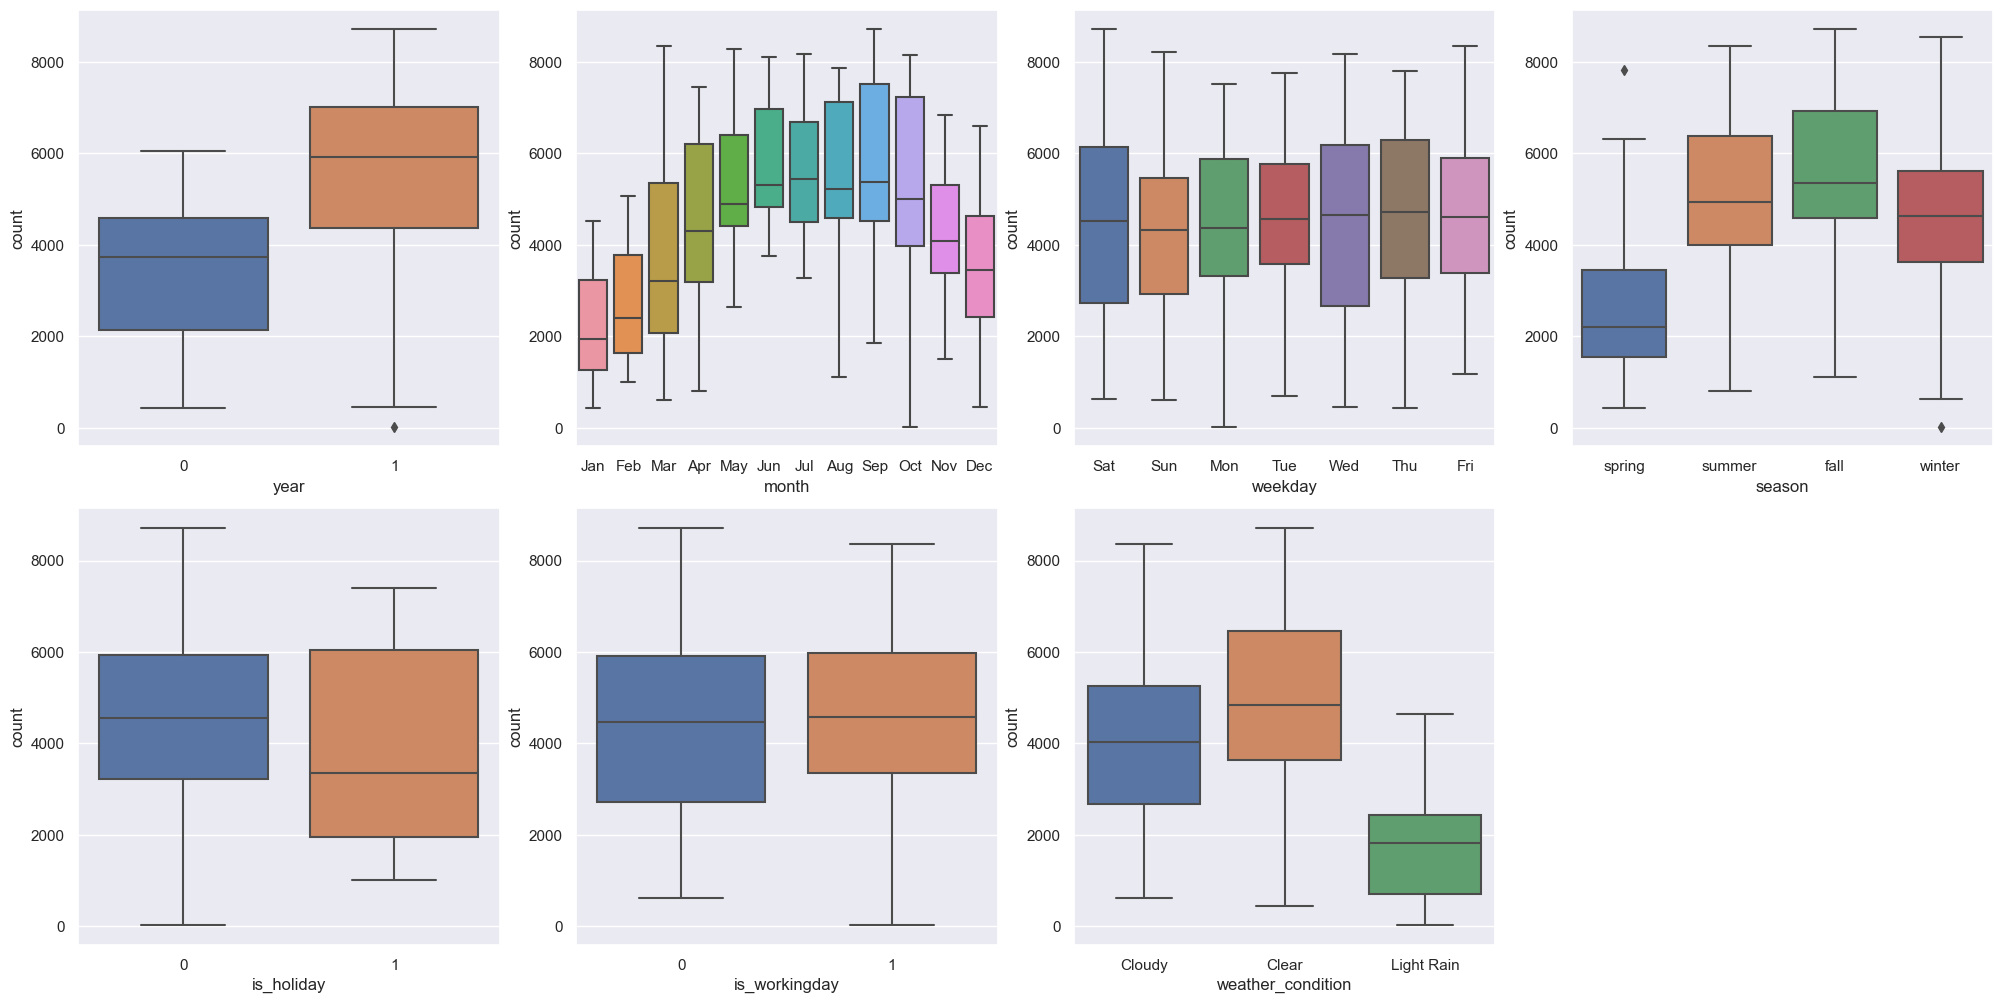

In [17]:
categorical_cols = ['year', 'month', 'weekday', 'season', 'is_holiday', 'is_workingday', 'weather_condition']
plt.figure(figsize = (20, 10))

for i in enumerate(categorical_cols):
    plt.subplot(2, 4, i[0]+1)
    plt.tight_layout(pad=0.5)
    sns.boxplot(x = i[1], y= 'count', data = bike)

### Remove redundant features

Drop Rationales:

*instant*- This is just a index for each observation.

*dteday* - This represnt the date on which the observation is recorded. But it can be deduced using other featrues, ie, year, mont and weekday.

*temp* - It is the actual temperature of a particular day. We have atemp column which also tells about the feels-like temperature of that day.Both are highly correlated, as shown in the plot above. So I will keep atemp and drop temp.

*casual* and *registered*: already represented via *cnt = casual + registered*.

In [18]:
bike.drop(columns=['instant', 'dteday', 'temp', 'casual', 'registered'], inplace=True)

In [19]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             731 non-null    object 
 1   year               731 non-null    int64  
 2   month              731 non-null    object 
 3   is_holiday         731 non-null    int64  
 4   weekday            731 non-null    object 
 5   is_workingday      731 non-null    int64  
 6   weather_condition  731 non-null    object 
 7   atemp              731 non-null    float64
 8   humidity           731 non-null    float64
 9   windspeed          731 non-null    float64
 10  count              731 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Correlation between continuous variable & count

#### Weather conditions to Count

/var/folders/4q/nvrns__x6gvdypz8mkzb5c4w0000gn/T/ipykernel_53565/168947988.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i[0]+1)


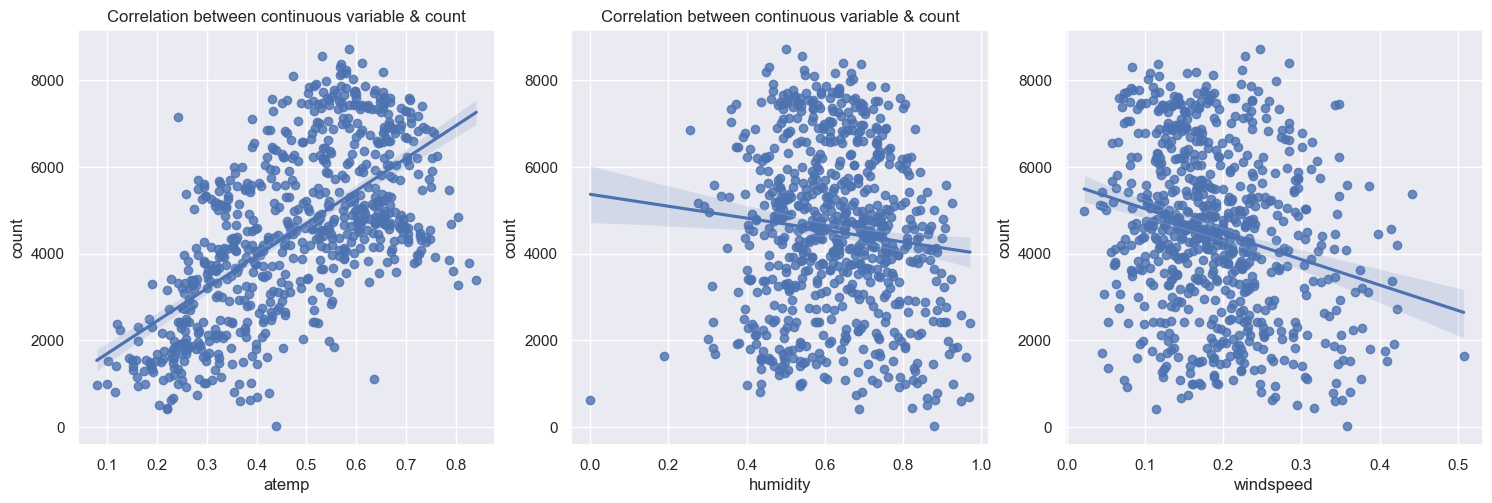

In [20]:

plt.figure(figsize = (15, 5))

continuous_cols = ['atemp', 'humidity', 'windspeed']
for i in enumerate(continuous_cols):
    plt.title('Correlation between continuous variable & count')
    plt.subplot(1, 3, i[0]+1)
    plt.tight_layout(pad=0.5)
    sns.regplot(x=i[1], y='count', data=bike)

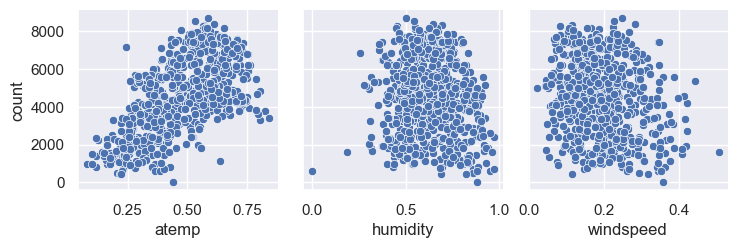

In [21]:
import seaborn as sns

sns.pairplot(data=bike, x_vars=['atemp', 'humidity', 'windspeed'], y_vars=['count'])

From the above plots, it seems that atemp is positively correlated with count.
However, the humidity and windspeed have slightly negative co-relation.

<Axes: >

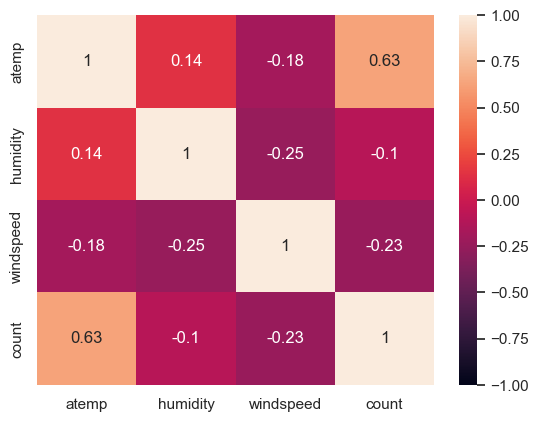

In [22]:
corr = bike[['atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(data=corr,
           vmax=1.0,
           vmin=-1.0,
           annot=True)